In [3]:
# Import training helper
import matplotlib.pyplot as plt
# ...existing code...
import sys, os
# adjust the path to point to your project root (where `backend/` lives)
sys.path.append(os.path.abspath('..'))  # or '.' or '/full/path/to/project'
# ...existing code...
from backend.train_loyalty import train_and_evaluate
# ...existing code...
import pandas as pd
%matplotlib inline

In [5]:
# Run training (defaults use models/rfm_features.csv and data/cleaned/sample_cleaned.csv)
results = train_and_evaluate('../models/rfm_features.csv', '../data/cleaned/sample_cleaned.csv')
print('Training finished. Models and metrics available in `results`.')
results['metrics']

Training finished. Models and metrics available in `results`.


{'logistic': {'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'roc_auc': 1.0},
 'random_forest': {'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'roc_auc': 1.0}}

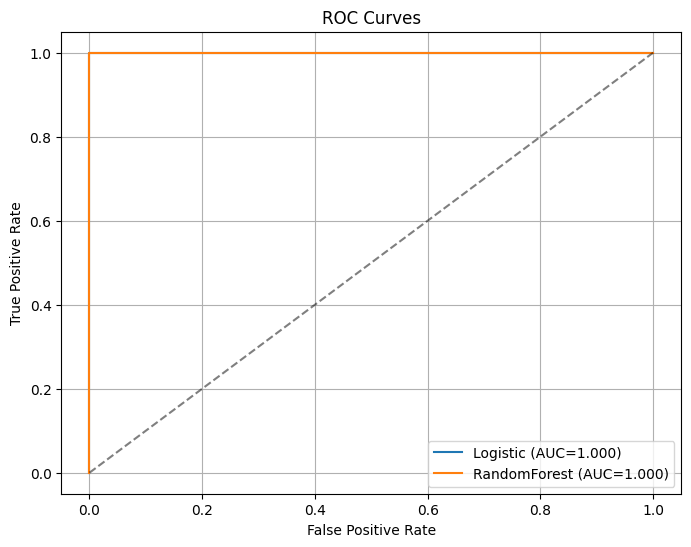

In [7]:
# Plot ROC curves for both models
from sklearn.metrics import roc_curve, auc
X_test = results['test']['X_test']
y_test = results['test']['y_test']
y_proba_lr = results['test']['y_proba_lr']
y_proba_rf = results['test']['y_proba_rf']

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr) if len(set(y_test))>1 else ([0,1],[0.5,0.5],[0])
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf) if len(set(y_test))>1 else ([0,1],[0.5,0.5],[0])

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic (AUC={results["metrics"]["logistic"]["roc_auc"]:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest (AUC={results["metrics"]["random_forest"]["roc_auc"]:.3f})')
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

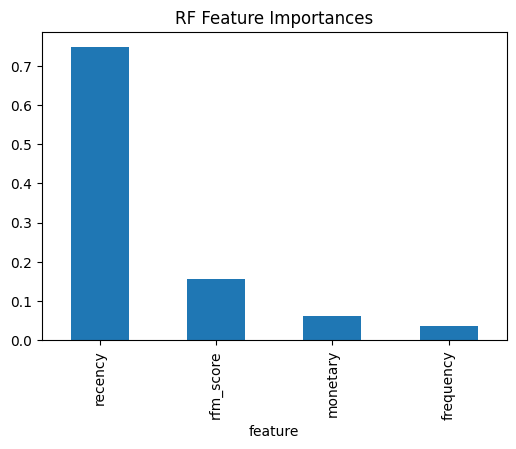

In [8]:
# Feature importance for Random Forest (if available)
fi = results.get('rf_feature_importances')
if fi:
    df_fi = pd.DataFrame(list(fi.items()), columns=['feature','importance']).sort_values('importance', ascending=False)
    df_fi.plot.bar(x='feature', y='importance', legend=False, figsize=(6,4), title='RF Feature Importances')
else:
    print('No RF feature importance available')